# Mathematical modelling of biochemical systems and simulations with Python

In this tutorial you will learn about the deterministic formalism for the *temporal* modelling of *simple*\* chemical systems, and you will learn to write a simulation program, from scratch, using Python 2.7. This tutorial goes hand in hand with the slides provided.

\* the word *simple* refers to "spatially homogenous" (i.e. spatially uniform mixture of chemical species, as opposed to spatially varied, where you could find regions with higher concentrations of some molecules but not others).

As you can already imagine, there are many interactive programs available for you to download freely and use for your simulations, such as COPASI. We think it is advantageous in many ways to understand how this formalism is constructed. It will help you, for example, decide in what contexts this framework is more appropriate, and understand the reasons why you might get different results with the deterministic and stochastic approaches.


### To note

If you would like to learn in detail about the *stochastic* framework for modelling the temporal evolution of simple chemical systems, we refer you to [this](https://github.com/karinsasaki/gillespie-algorithm-python) tutorial.

The tutorial you currently hold deals only with modelling the evolution of a chemical system, in *time*. If you would like to learn to design a *spatial* model and simulate it, we refer you to [this (coming soon)]() tutorial.


### Structure of tutorial

In **Part I** we introduce Chemical Reaction Network Theory, a mathematical subject that deals with building mathematical models of chemical systems. Here we also introduce some of the chemical laws.

In **Part II** we show two examples of how to simulate a mathematical model of a biochemical system with python.

In **Part III** we explain the methods for numerical integration of a system of differential equations and we explain the Euler method in detail.

In **Part IV** we touch briefly on parameter estimation.

In **Part V** we use these the same strategy as in Part II, to simulate a signal transduction network.

In **Part VI** we mention briefly further steps in the process of modelling biological systems.


### References

This tutorial is based on:

1. Chapter 19, Yeast Systems Biology, Methods and Protocols, Humana Press
2. E. Klipp et al., Integrative model of the response of yeast to osmotic shock, Nature Biotechnology, Vol23, 2005
3. [Chemical Reaction Network Theory Wikipedia Page](https://en.wikipedia.org/wiki/Chemical_reaction_network_theory)
4. [Modelling in Biology, Guy-Bart Stan](http://www.bg.ic.ac.uk/research/g.stan/2010_Course_MiB_article.pdf), Imperial College London
5. Chemistry, (3rd edition, 2006) by Catherine E. Housecroft and Edwin C. Constable from Pearson Prentice Hall

### Acknowledgements

This tutorial was make by Dr. Karin Sasaki (Centre for Biological Modelling at the European Molecular Biology Laboratory). You can email her at karin.sasaki@embl.de with any questions, comments or corrections.

## Part I - Chemical reaction network theory

Chemical reaction network theory is an area of applied mathematics that attempts to model the behaviour of real world chemical systems. Mathematical modelling of chemical reaction networks usually focuses on what happens to the concentrations of the various chemicals involved, as time passes. (Other factors that affect the reactions, apart from concentration, are, for example, temperature, pressure and physical state of reactants.)
 
A chemical reaction network comprises a set of reactants, a set of products and a set of reactions. For example the pair of combustion reactions below forms a reaction network:

<img src="kins1.png\" style="width: 200px;"/>

Let `[H_2]` represent the concentration of H2, `[H2O]` that of H2O, etc. Since all of these concentrations will not in general remain constant, they can be written as a function of time:

<img src="kins2.png\" style="width: 400px;"/>
 
These variables can then be combined into a vector

<img src="kins3.png\" style="width: 200px;"/>
 
and their evolution with time can be written

<img src="kins4.png\" style="width: 200px;"/>
 
(Note: We will eventually drop the squared brackets that indicate concentration.)

The number of molecules of each reactant used up each time a reaction occurs is constant, as is the number of molecules produced of each product. These numbers are referred to as the *stoichiometry* of the reaction. 

The reaction is assumed to happen a fixed number of times in unit time; that is, the *rate of the reaction* is *constant* and this *reaction constant* needs to be calculated, either experimentally or computationally (see Part  IV). 

It turns out that the equation representing the chemical reaction network can be rewritten as:

<img src="kins6.png\" style="width: 100px;"/>

Where each column of the constant matrix `Γ` represents the net stoichiometry of each reaction (i.e. column 1 for reaction 1, column 2 for reaction 2, etc) and `V` is a column vector where each input represents the reaction rate of each reaction, which we calculate given certain assumptions, using kinetic laws. Below we see why this is the case, using the assumption of Mass Action kinetics.


### The Law of Mass Action

Mass action kinetics assumes a linear dependence of the rate of the reaction on substrates concentrations. So for example, for the reaction `A + B -> C`, the rate of the reaction would be `v = k*A*B`, where parameter `k` is the reaction constant. The law of mass action makes sense in systems where the numbers of molecules are relatively similar to each other, in magnitude.

Now, assuming mass action for the pair of combustion reactions, we can calculate the rate of the reactions using a diagram such as the one below:

<img src="kins5.png\" style="width: 400px;"/>

Mathematically, we can write this as:

<img src="kins10.png\" style="width: 400px;"/>

and given the assumption of mass action we have that 

<img src="kins11.png\" style="width: 200px;"/>

If we do this calculation for both reactions, we will soon realise that we can write `V` as:

<img src="kins12.png\" style="width: 200px;"/>

and we can write

<img src="kins6.png\" style="width: 100px;"/>

as follows:

<img src="kins7.png\" style="width: 900px;"/>

So the reaction rates of vector `V` are calculated depending on the kinetic law that is assumed, or on the system that you have. There are other kinetic laws, such as Michaelis-Menten and the Hill equation and there are systems where these kinetic laws actually do not apply. To learn about how to apply Michaelis-Menten and the Hill equation to mathematical modelling, we refer you to reference 4, section 3.8. If you would like to learn more in general about reaction kinetics, we recommend you look at a chemistry reference book, such as reference 5. chapter 3.


### Exercises

Write down the 

<img src="kins6.png\" style="width: 100px;"/>

for all the systems below, assuming Mass action only.

<img src="ex.png\" style="width: 700px;"/>

## Part II - Simulating two simple examples


### Decay

Chemical equation of the reaction:
<img src="decay.png\" style="width: 300px;"/>

Mathematical equation of the rate of change of the concentration of A, assuming Mass Action:
<img src="decay2.png\" style="width: 200px;"/>

Below, we write a program in python that simulates this mathematical model, with the following parameter values and initial conditions:

```
rate of reaction k1 = 0.005
initial concentration A_0 = 10000
```

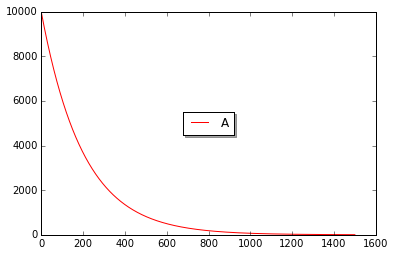

In [1]:
# import modules and libraries
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

# Parameters
k1 = 0.005
params = (k1)

# Initial conditions
A_0 = 10000
ini = (A_0)

# Time
dt = 1
t = np.arange(0,1500,dt)

# ODE system (in format used for odeint)
def myODE(init,t,params):
    
    k1 = params
    
    A = init

    # rates
    v1 = -k1*A
    
    # equations
    dA = v1
        
    return (dA)

# Solve using odeint
solution = odeint(myODE,ini,t,args=(params,)) 
tA = solution[:,0]

# Show over time
fig, ax = plt.subplots()
ax.plot(t, tA, 'r', label='A')
legend = ax.legend(loc='center', shadow=True)
plt.show()

### Reversible reaction

Chemical equation of the reactions:
<img src="reversible1.png\" style="width: 300px;"/>

Mathematical equation of the rate of change of the concentrations of A and B:
<img src="reversible2.png\" style="width: 300px;"/>

Program in python that simulates the mathematical model, with the following parameter values and initial conditions:

```
rate of reaction k2f = 0.1
rate of reaction k1r = 0.05
initial concentration A_0 = 10000
initial concentration B_0 = 90
```

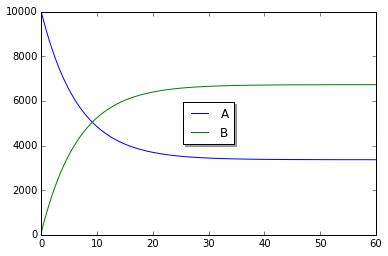

In [2]:
# import modules and libraries
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

# Parameters
k2f = 0.1
k2r = 0.05
params = (k2f, k2r)

# Initial conditions
A_0 = 10000
B_0 = 90
ini = (A_0, B_0)

# Time
dt = 0.1
t = np.arange(0,60,dt)

# ODE system (in format used for odeint)
def myODE(init,t,params):
    
    k1, k2 = params
    
    A, B = init

    # rates
    Gamma = np.array([[-1,1],[1,-1]])
    V = np.array([[k1*A],[k2*B]])
    rates = np.dot(Gamma,V)

    # equations
    dA = np.float64(rates[0])
    dB = np.float64(rates[1])
    
    return (dA,dB)

# Solve using odeint
solution = odeint(myODE,ini,t,args=(params,)) 
tA = solution[:,0]
tB = solution[:,1]

# Show over time
fig, ax = plt.subplots()
ax.plot(t, tA, label='A')
ax.plot(t, tB, label='B')
legend = ax.legend(loc='center', shadow=True)
plt.show()




## Exercises

Following a similar structure to the examples above, write a mathematical model (on a piece of paper) and a simulation program for each of the cases below. Choose different parameter values and initial conditions. Analyse your results and discuss them with your neighbour.

<img src="ex.png\" style="width: 700px;"/>

In [ ]:
# Enzymatic reaction

In [ ]:
# Gene expression

## Part III - Numerical integration of ordinary differential equations

In the exercises above, we have numerically integrated (in other words, approximated a solution to) the ordinary differential equations that describe the change in concentrations in time. We have done this approximation using a function from the scipy library, called `odeint`. But what exactly does odeint do? Below we study a method that illustrates the idea a numerical integration, the Euler Method.

### The Euler Method

An ordinary differential equation is of the form:

<img src="euler1.png\" style="width: 300px;"/>

where `f` is a function of time and if the concentrations of the reactants and the initial condition `y_0` is a known vector.

Remember from school maths that from any point on a curve, you can find an approximation of a nearby point on the curve by moving a short distance along a line tangent to the curve. So, starting with the differential equation that describes your system, replace the derivative `y'` by the finite difference approximation and rearrange:

<img src="euler2.png\" style="width: 200px;"/>

<img src="euler3.png\" style="width: 210px;"/>

<img src="euler4.png\" style="width: 220px;"/>

The last equation basically says that: to approximate a solution to differential equations it is enough to:

1. start at the initial time `t_0`
2. choose a step size `h` and construct a sequence `t_0`, `t_1 = t_0+h`, `t_2 = t_1+h` ... 
3. calculate the numerical estimates `y(t_(k+1)) = y(t_k) + h*f(t_k, y(t_k))`, iteratively for all `k=1,...,n`, where `n` is specified by the maximum time that you want to simulate the system for.

The important thing to notice here is that this particular numerical method uses the time step `h`, the value of the parameters of the previous time `y(t_k)` and the value of the differential equations of the previous time `f(t_k, y(t_k))`, to calculate the value of the parameters in the current time `y(t_(k+1))`. Other numerical methods, such as `odeint` might use a different strategy, but the idea is similar, in that it is an iterative process.

Below is an example of how to apply the Euler Method to approximate the system describing a reversible reaction. Compare the result with the simulation done above, with `odeint`, in particular, it could be informative to see how long the Euler Method and `odeint` take. See if you can find out how to time them.

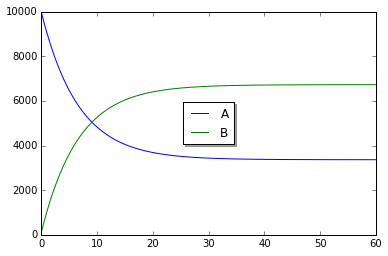

In [3]:
# import modules and libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Parameters
k2f = 0.1
k2r = 0.05
params = (k2f, k2r)

# Initial conditions
A_0 = 10000
B_0 = 90
ini = (A_0, B_0)

# Time
h = 0.1
t = np.arange(0,60,h)
At = np.zeros_like(t)
Bt = np.zeros_like(t)
At[0] = A_0
Bt[0] = B_0

# ODE system (in format used for odeint)
def myODE(A,B,params):
    
    k1, k2 = params
    
    # rates
    Gamma = np.array([[-1,1],[1,-1]])
    V = np.array([[k1*A],[k2*B]])
    rates = np.dot(Gamma,V)

    # equations
    dA = np.float64(rates[0])
    dB = np.float64(rates[1])
        
    return (dA, dB)

# Solve using Euler Method
for step in range(1,len(t)):
    dA,dB = myODE(At[step-1],Bt[step-1],params)
    At[step] = At[step-1] + h*dA
    Bt[step] = Bt[step-1] + h*dB

# Show over time
fig, ax = plt.subplots()
ax.plot(t, At, label='A')
ax.plot(t, Bt, label='B')
legend = ax.legend(loc='center', shadow=True)
plt.show()

### Exercise

Use the Euler method to solve the gene regulation system.

In [ ]:
# Gene regulation

## Part IV - Data fitting for parameter estimation

Parameter estimation is the attempt to determine the values of the kinetic constants or other parameter values of a specific model from experimental data. This is a crucial step in model construction, at the same time it is a step which has to face uncertainty on different levels: uncertainty about the network structure of the model, uncertainty in the experimental data, and uncertainty in the conditions under which the experimental data have been measured. Essentially, we can employ both quantitative and qualitative data to restrict the range of possible parameter values. In most cases, it is not possible to determine parameter values uniquely. Often, we find many sets of parameter values that can equally well explain the data. To discriminate among those sets, one may employ additional investigations of the model under various conditions.

In practice, the idea is to intend to minimise the sum of squared distances of  time course experimental data `y_(i,j)` and simulation results `x_i` given as
<img src="err1.png\" style="width: 200px;"/>
where index `i` runs over all compounds, index `j` over all experiments, and index `k` over all measurement time points.

A number of computational tools are available to enable parameter estimation. Among them is the frequently used tool Copasi, but you can also write your own program, as illustrated bellow, for the simple system of decay. Go through the program and make sure you understand it.

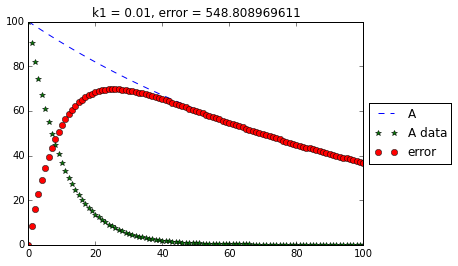

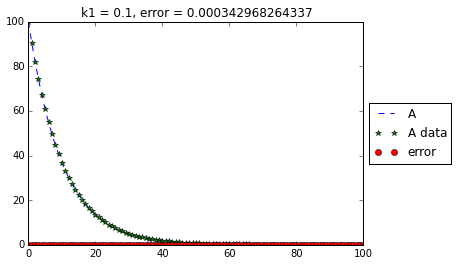

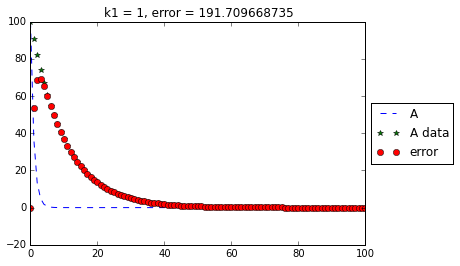

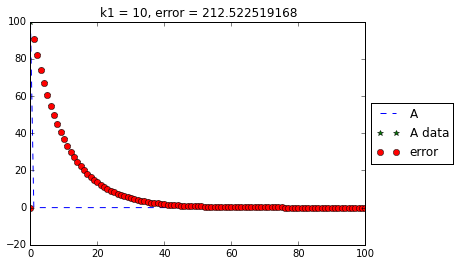

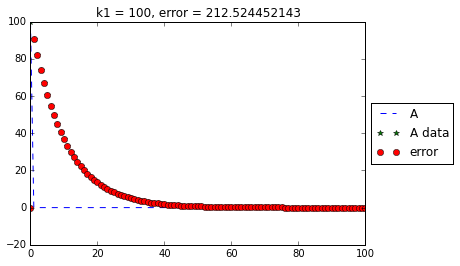

In [5]:
# import modules and libraries
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

# ODE system (in format used for odeint)
def myODE(init,t,params):
    
    k1 = params
    
    A = init

    # rates
    v1 = -k1*A
    
    # equations
    dA = v1
        
    return (dA)


# Parameters
k1_a = 0.01
k1_b = 0.1
k1_c = 1
k1_d = 10;
k1_e =100
params_a = (k1_a)
params_b = (k1_b)
params_c = (k1_c)
params_d = (k1_d)
params_e = (k1_e)

# Initial conditions
A_0 = 100
ini = (A_0)

# Time
dt = 1
t = np.arange(0,101,dt)

# Solve using odeint
solution_a = odeint(myODE,ini,t,args=(params_a,)) 
solution_b = odeint(myODE,ini,t,args=(params_b,)) 
solution_c = odeint(myODE,ini,t,args=(params_c,)) 
solution_d = odeint(myODE,ini,t,args=(params_d,)) 
solution_e = odeint(myODE,ini,t,args=(params_e,)) 
tA_a = solution_a[:,0]
tA_b = solution_b[:,0]
tA_c = solution_c[:,0]
tA_d = solution_d[:,0]
tA_e = solution_e[:,0]

# import data
data = np.loadtxt('data.txt')
time_data = data[:,0]
A_data = data[:,1]

# calculate the the sum of squared distances
err_a = np.sqrt(np.sum(np.square(tA_a - A_data)))
err_b = np.sqrt(np.sum(np.square(tA_b - A_data)))
err_c = np.sqrt(np.sum(np.square(tA_c - A_data)))
err_d = np.sqrt(np.sum(np.square(tA_d - A_data)))
err_e = np.sqrt(np.sum(np.square(tA_e - A_data)))

# Show over time
fig, ax = plt.subplots()
ax.plot(t, tA_a, '--', label='A')
ax.plot(t, A_data, '*', label='A data')
ax.plot(t, np.sqrt(np.square(tA_a - A_data)), 'o', label='error')
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
str = 'k1 = 0.01, error = {}'.format(err_a)
plt.title(str)
plt.show()

fig, ax = plt.subplots()
ax.plot(t, tA_b, '--', label='A')
ax.plot(t, A_data, '*', label='A data')
ax.plot(t, np.sqrt(np.square(tA_b - A_data)), 'o', label='error')
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
str = 'k1 = 0.1, error = {}'.format(err_b)
plt.title(str)
plt.show()

fig, ax = plt.subplots()
ax.plot(t, tA_c, '--', label='A')
ax.plot(t, A_data, '*', label='A data')
ax.plot(t, np.sqrt(np.square(tA_c - A_data)), 'o', label='error')
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
str = 'k1 = 1, error = {}'.format(err_c)
plt.title(str)
plt.show()


fig, ax = plt.subplots()
ax.plot(t, tA_d, '--', label='A')
ax.plot(t, A_data, '*', label='A data')
ax.plot(t, np.sqrt(np.square(tA_d - A_data)), 'o', label='error')
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
str = 'k1 = 10, error = {}'.format(err_d)
plt.title(str)
plt.show()

fig, ax = plt.subplots()
ax.plot(t, tA_e, '--', label='A')
ax.plot(t, A_data, '*', label='A data')
ax.plot(t, np.sqrt(np.square(tA_e - A_data)), 'o', label='error')
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
str = 'k1 = 100, error = {}'.format(err_e)
plt.title(str)
plt.show()



From this we can conclude that the best parameter value amongst the ones tested is that which yields the smallest error, namely k1 = 0.1.

A similar approach is used when more parameters need to be estimated, but you need to be more thorough on how you write the program, for example, by writing functions that take as input an array of parameter values to be tested. You also need to generalise how to save the output of the calculations, by using multidimensional arrays in clever ways.

Once you have done a *brute force* approach to find a good enough estimate for a parameter value (brute force being that you check every value, such as above), you can adopt a different strategy that uses optimisation methods to find the 'optimal' parameter values. You can of course implement these methods with Python and you do not have to write them yourself. One such method could be `scipy.optimize.minizime`, which could be used to find the parameter values that minimise the squared distances, as shown above, or that minimise some other function fo your choice. 

For the rest of the tutorial, you will be provided with the parameter values and you will not need to estimate them, namely because there is no experimental data available to do so. However, it is important to remember this step in the creation of mathematical models of biological systems, as most of the time you will not have exact values to work with.

# Pat II - Mathematical model of how *S. cerevisiae* copes with loss of turgor

In this section we focus on models of intracellular pathways that transmit their signals via protein-protein interactions or interactions with second messengers.

## The High Osmolarity Gycerol (HOG) system

The response of yeast to osmotic stress has been described by a model [1] that comprises the high osmolarity glycerol (HOG) pathway, transcriptional regulation, the effect on metabolism and the change in the production of glycerol and an additional model describing regulation of volume and osmotic pressure (see figure). The HOG pathway consists of two input branches, the Sln1 branch and the Sho1 branch (which is not considered in the model). The receptor Sln1 is a membrane protein that senses the osmotic changes. Under normal conditions, it is continuously phosphorylated and transmits its phosphate group to Ypd1, which in turn passes it on to Ssk1. In this way, Ssk1 is kept phosphorylated and inactive. This module consisting of Sln1, Ypd1, and Ssk1 is a so-called phosphorelay system. Upon osmotic stress, phosphorylation of Sln1 is interrupted and Ssk1 switches to a non-phosphorylated, active state. In this form, it triggers the HOG MAP kinase cascade, which involves the redundant proteins Ssk2 and Ssk22 as well as Pbs2 and Hog1. Phosphorylated Hog1 can enter the nucleus and regulate the transcription of a series of genes.

In this tutorial we will model some of the modules, and we start with the MAP kinase cascade.

<img src="all.png\" style="width: 900px;"/>       

## Modelling the MAP kinase cascade

Mitogen-activated protein kinase (MAPK) cascades consist of three or four different proteins that specifically catalyze the phosphorylation of the subsequent proteins.

When creating a (mathematical) model of a system, which molecules and interactions play a role and which of them will be left out is a question that needs to be answered. Omitting certain processes from the models is based on the assumption that they have only a minor influence on the event under study, that their values remain constant in the experimental setup, or that they simply cannot be described with the currently available means. For example, the effect of regulated gene expression is usually neglected in the modeling of metabolic networks although modelers are certainly aware of production and degradation of enzymes. But the different time scales of protein turnover and metabolic reactions justify this simplification in many cases.

To illustrate the importance of understanding exactly what is being modelled and the assumptions that are being made, we look at two different proposed models of the MAP kinase cascade, and compare the outcome of their mathematical modelling and simulation.

### MAP Kinase cascade - model 1

Suppose that we assume the model illustrated on the left hand side of the image, to be the correct mechanisms of the system. Then assuming mass action, we can construct a mathematical model, as illustrated on the right hand side of the image.

<img src="imMAPkin1.png\" style="width: 600px;"/>


#### Exercise

1. Make sure that you understand how the mathematical model was derived.
2. Write down, in bullet points, all the assumptions being made in this model.
3. Simulate the system with the following rate values and initial conditions:

```
Rate Values
k0 = 1.2
k1 = 0.96
k2 = 1.18
k3 = 1
k4 = 1
k5 = 1
k6 = 1

Initial Conditions
Receptor_0 = 1
Phosphotase_0 = 1
MAPKKKP_0 = 0
MAPKKP_0 = 0
MAPKP_0 = 0
MAPKKK_0 = 1
MAPKK_0 = 1
MAPK_0 = 1
```

#### Answers

    2. 

    * all reaction follow mass action kinetics
    * each reaction is catalyzed either by the upstream kinase or by a phosphatase
    * the receptor, once activated, gets degraded
    * phosphotase and the receptor are not in abundance
    
    3.

In [ ]:
# import modules and libraries


# initialise the parameters to the values indicated

    # collect all the parameters into a tuple variable called params


# define the initial conditions of each of the reactants - what is the simplest possible system that you can choose?

    # collect all the initial values into a tuple variable called ini

    
# define the time interval dt and the time range t from 0 to a maximum time of your choice, using the command 
# arange from numpy


# Define the ODE system as a function that will be passed to the command odeint (read the documentation).
# This function should have three inputs: initial conditions, time and parameters

    # extract all the parameters into different variables    


    # extract the initial conditions of each reactant into different variables    


    # define the rates of the reactions

    
    # define the differential equations that represent the rate of change of the concentration of each reactant

    
    # return the result of the simulation        
    

# integrate the system numerically, using odeint, and allocate the output to a varialbe called solution


# allocate the output of each reactant to different variables, you need index solution


# plot the results using matplotlib
    # it might not be very informative to plot the timecourse of all the reactants, whichones would be
    # most informative? don't forget to include axes labels and a legend

### MAP Kinase cascade - model 2

Now suppose we assume the MAP kinase cascade model used in referece [1]. 

<img src="map1.png\" style="width: 900px;"/>


#### Exercise

1. Notice the differences in the two models and write them down.
2. Derive a mathematical model of this system.
3. Write, in bullet points, all the assumptions beng made in this model.
4. Simulate the system with the following rate values and choose the simplest possible initial conditions that will help you understand the system:
```
k0 = 1.2
k1 = 1.438
k2 = 1.438
k3 = 1.438
k4 = 1.438
k5 = 1.438
k1m = 0.011
k2m = 0.011
k3m = 0.011
k4m = 0.011
k5m = 0.011
```
5. Compare the output of the simulation with the previous model of the MAP kinase cascade. Write down your observations.

6. Explore how initial abundance of compounds affects signal amplification/dampening. You can test first the values below and then change them as you explore further.

```
Ssk1_0 = 1
Ssk2_0 = 274
Ssk2P_0 = 0
Pbs2_0 = 2160
Pbs2P_0 = 0
Pbs2P2_0 = 0
Hog1_0 = 678
Hog1P_0 = 0
Hog1P2_0 = 0
```


#### Exercises answers

1.

2.

3.

4.

In [ ]:
# import modules and libraries


# initialise the parameters to the values indicated

    # collect all the parameters into a tuple variable called params


# define the initial conditions of each of the reactants - what is the simplest possible system that you can choose?

    # collect all the initial values into a tuple variable called ini

    
# define the time interval dt and the time range t from 0 to a maximum time of your choice, using the command 
# arange from numpy


# Define the ODE system as a function that will be passed to the command odeint (read the documentation).
# This function should have three inputs: initial conditions, time and parameters

    # extract all the parameters into different variables    


    # extract the initial conditions of each reactant into different variables    


    # define the rates of the reactions

    
    # define the differential equations that represent the rate of change of the concentration of each reactant

    
    # return the result of the simulation        
    

# integrate the system numerically, using odeint, and allocate the output to a varialbe called solution


# allocate the output of each reactant to different variables, you need index solution


# plot the results using matplotlib
    # it might not be very informative to plot the timecourse of all the reactants, whichones would be
    # most informative? don't forget to include axes labels and a legend

5.

6.

In [ ]:
# import modules and libraries


# initialise the parameters to the values indicated

    # collect all the parameters into a tuple variable called params


# define the initial conditions of each of the reactants - what is the simplest possible system that you can choose?

    # collect all the initial values into a tuple variable called ini

    
# define the time interval dt and the time range t from 0 to a maximum time of your choice, using the command 
# arange from numpy


# Define the ODE system as a function that will be passed to the command odeint (read the documentation).
# This function should have three inputs: initial conditions, time and parameters

    # extract all the parameters into different variables    


    # extract the initial conditions of each reactant into different variables    


    # define the rates of the reactions

    
    # define the differential equations that represent the rate of change of the concentration of each reactant

    
    # return the result of the simulation        
    

# integrate the system numerically, using odeint, and allocate the output to a varialbe called solution


# allocate the output of each reactant to different variables, you need index solution


# plot the results using matplotlib
    # it might not be very informative to plot the timecourse of all the reactants, whichones would be
    # most informative? don't forget to include axes labels and a legend

    6. comments and observations

# MAP Kinase module with nuclear entry of Hog1P2

Now you are going to extend the model by including the entry of Hog1P2 to the nuclear compartment. 

<img src="map2.png\" style="width: 900px;"/>

### Exercise

1. Derive a mathematical model for the entry of Hog1P2 into the nucleus. To define a different compartment, it suffices to create variables with the appropiate names, for example Hog1P2cyt and Hog1P2nuc for Hog1P2 that is in the cytosol and in the nucleus respectively. You then need to create a new reaction that represents Hog1P2cyt entering the nucleus. These parameters are all given to you in the image.
2. Include this model in the above python simulation, with the following rates values and choose appropiate initial conditions that will let you analyse the system. This also about the length of time that you want/need to simulate for:
```
ktrans = 0.029
kdephos = 0.0053
ktrans1 = 0.110
ktrans2 = 0.091
```
3. Choose which components of the system to plot, to analyse the system in the context of osmolarity and write down your observations.

### Answers

1. <img src="eqs5.png\" style="width: 800px;"/>

2., 3.

comments and observations

# MAP kinase cascade module and Transcription module

Finally, you will include the transcription module into the model.

<img src="map3.png\" style="width: 900px;"/>


### Exercise

1. Derive a mathematical model for the transcription of 'proteins'.
2. Include this model in the above python simulation, with the following rates values and choose appropiate initial conditions that will let you analyse the system. This also about the length of time that you want/need to simulate for:
```
kts1 = 0.0005
kex1 = 0.0037
krd1 = 8.085
ktl1 = 0.0205
kpd1 = 0.000125
```
3. Choose which components of the system to plot, to analyse the system in the context of osmolarity and write down your observations.


### Answers

1.

2., 3.

Comments and observations

## Optional further extension of this exercise

You can also model and simulate the phosphorelay and the metabolic modules, and connect them to the modules you already have ready. You can also include a model of osmotic stress, turgor pressure and changing cell volume. You can base yourself on the work done in [1].

# Part III - What else do I need to know/do when modelling and simulating a biological system?


## Sensitivity analysis  for steady states:

The aim is to check the dependence of the steady-state behavior on parameter values. You can check effects of large parameter changes and do sensitivity analysis for time-dependent states. You can also check the effect of small molecule numbers by running stochastic simulations of your system, with small number of molecules, and seeing if the resulting behavious differs from the deterministic models.


## Perturbations for predictions

Just as it is done experimentally, you can perturb the system in many ways: (gene) deletion analysis, overexpression analysis, rewiring (e.g. introducing positive and negative feedback looops).